LetsGrowMore 
Submitted By Prachi Adlak - Data Science Intern
INTERMEDIATE TASK 
Task 3 : Prediction Using Decision Tree Classifier
Dataset: https://bit.ly/3kXTdox

IMPORT REQUIRED LIBRARY 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import rcParams

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#READING DATA 


In [5]:
data = pd.read_csv("Desktop/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
data.shape

(150, 6)

In [17]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#visualization

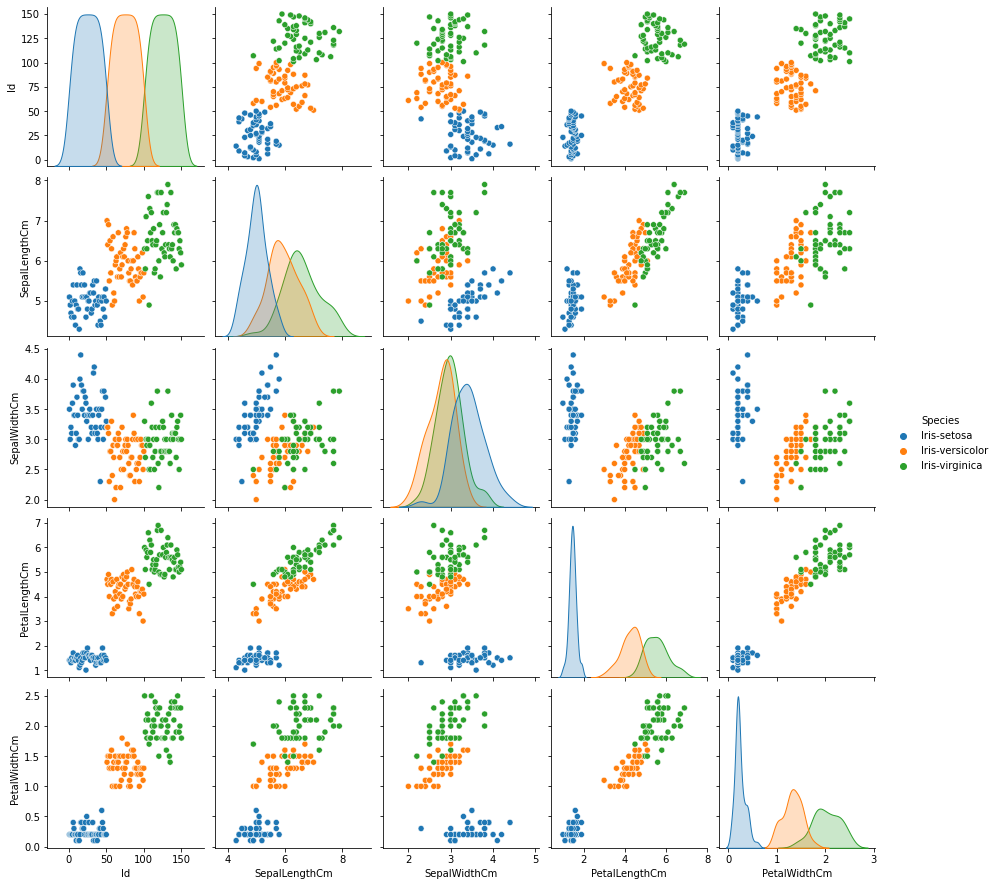

In [18]:
sns.pairplot(data, hue = 'Species')

#heatmap

<AxesSubplot:>

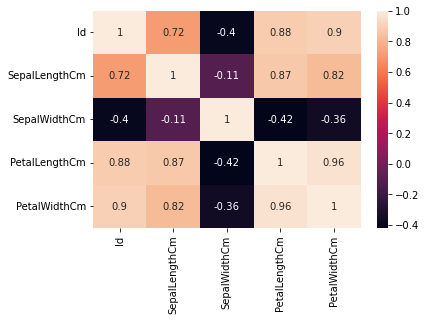

In [21]:
sns.heatmap(data.corr(), annot= True)

In [22]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


splitting data & processing 


In [23]:
X = data.iloc[:, [0,1,2,3]]
y = data.Species
data.shape

(150, 6)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lets build descision tree
DESCISION TREE 

In [25]:
classifier = DecisionTreeClassifier(criterion='entropy')

In [26]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [28]:
# let us print the accuracy score for the tree model
print("The accuracy score for the built model is:",accuracy_score(y_test, y_pred_test))

The accuracy score for the built model is: 1.0


The accuracy is upto the mark so let us now represent the data in a tree diagram

In [ ]:
#TREE DIAGRAM

[Text(0.4, 0.8333333333333334, 'X[0] <= 50.5\nentropy = 1.58466\nsamples = 120\nvalue = [41, 39, 40]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 100.5\nentropy = 0.99988\nsamples = 79\nvalue = [0, 39, 40]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

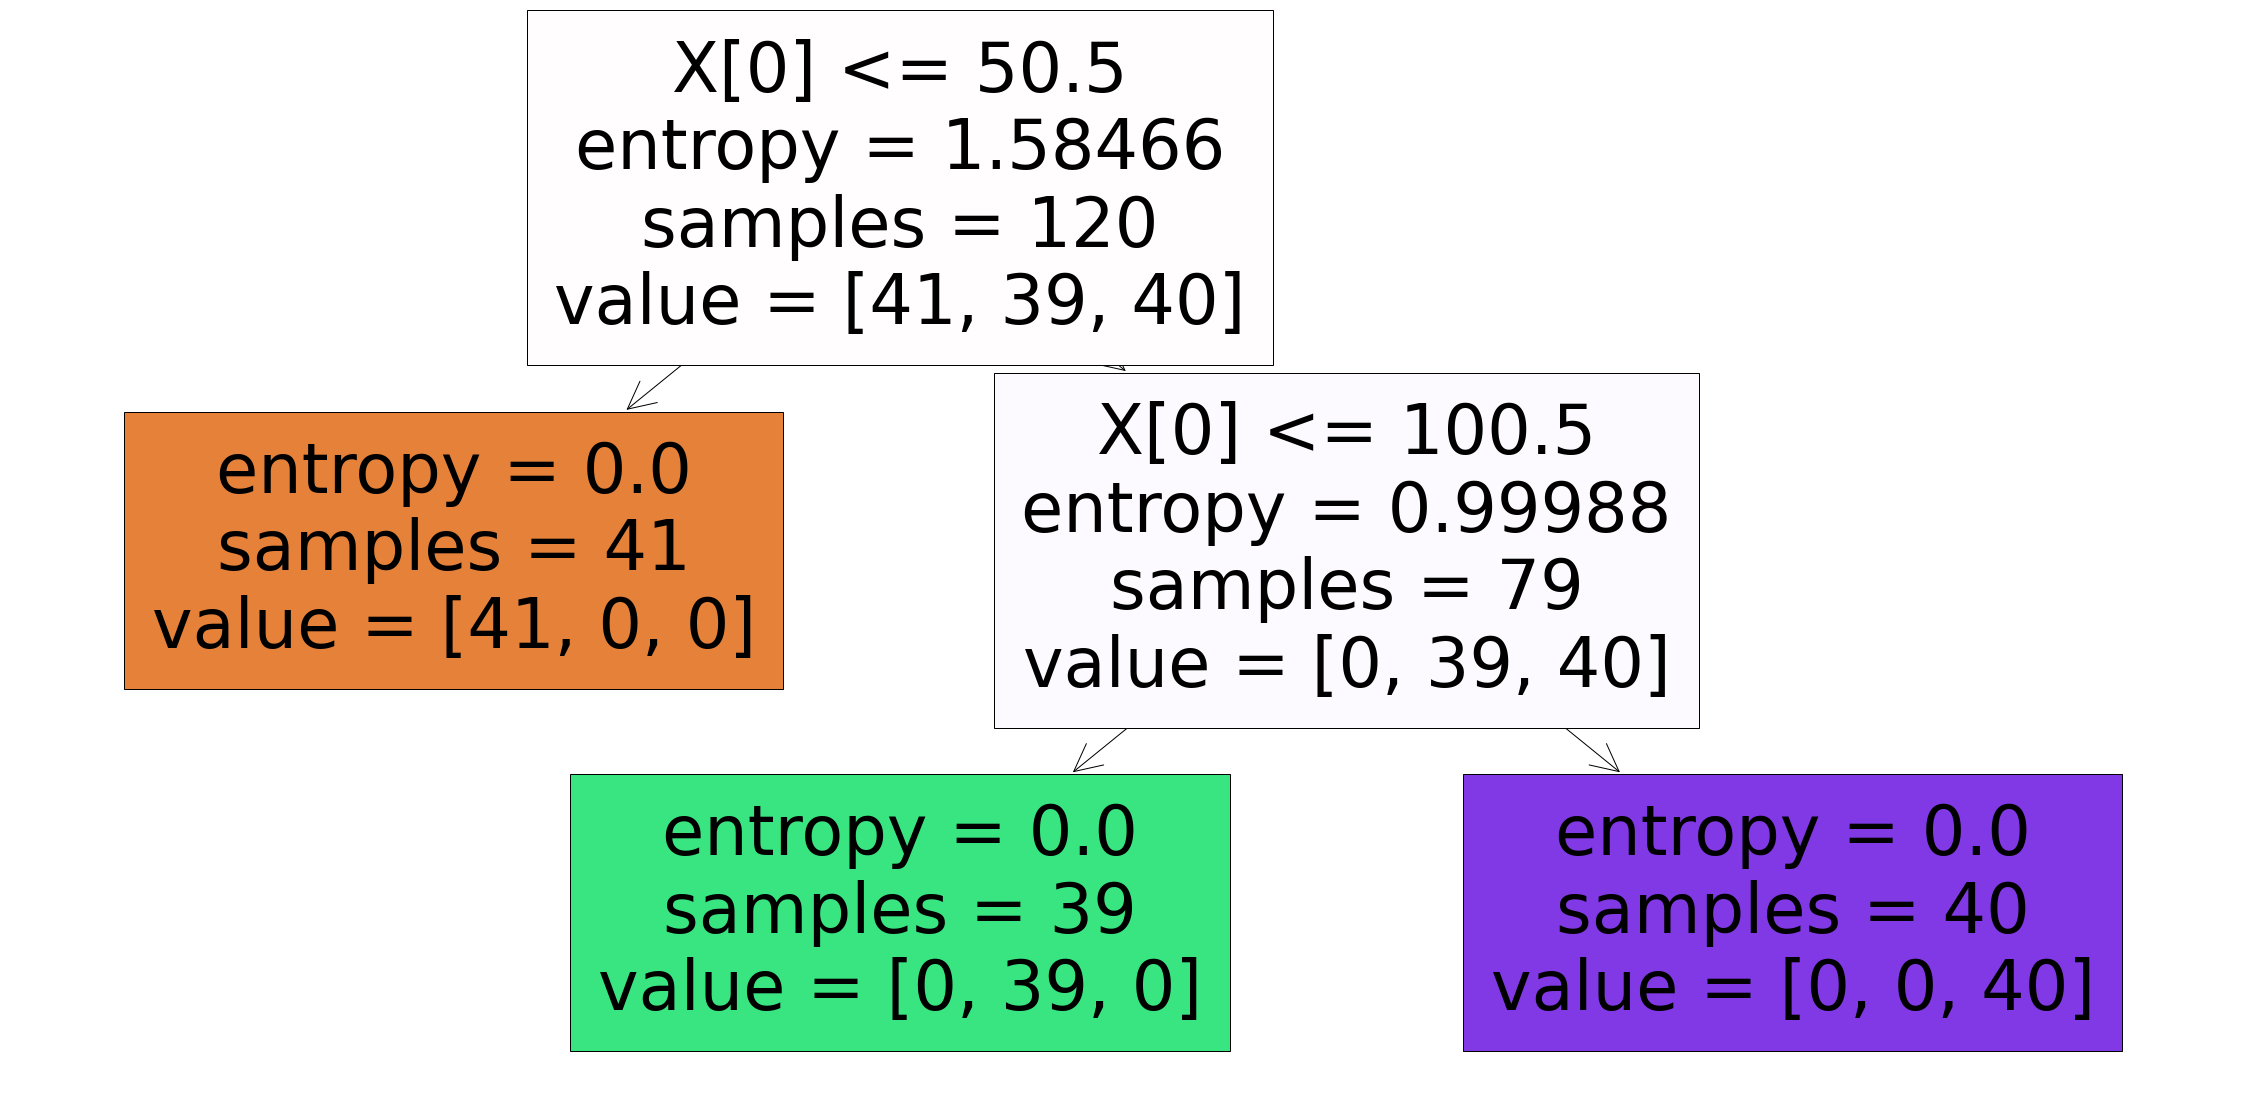

In [29]:
rcParams['figure.figsize'] = 40, 20
plot_tree(classifier, precision=5, rounded = False, filled = True)